In [1]:
import requests
import pandas as pd

In [24]:
Api_key = "G6KLCRETQVG55PCX"
symbol = "TSLA"
url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&interval=5min&apikey={Api_key}'

response = requests.get(url)
data = response.json()

df = pd.DataFrame.from_dict(data['Time Series (Daily)'],orient='index')
df.columns = ['open' , 'high' , 'low' , 'close' , 'volume']

df.index = pd.to_datetime(df.index)

df = df.apply(pd.to_numeric)
df.head()

,open,high,low,close,volume
2024-11-19,335.76,347.3799,332.75,346.00,88852452
2024-11-18,340.73,348.5499,330.01,338.74,126547455
2024-11-15,310.57,324.6799,309.22,320.72,114440286
2024-11-14,327.69,329.9800,310.37,311.18,120726109
2024-11-13,335.85,344.5999,322.50,330.24,125405599


In [25]:
df['Moving_avg'] = df['close'].rolling(window=5).mean()
df.head()

,open,high,low,close,volume,Moving_avg
2024-11-19,335.76,347.3799,332.75,346.00,88852452,NaN
2024-11-18,340.73,348.5499,330.01,338.74,126547455,NaN
2024-11-15,310.57,324.6799,309.22,320.72,114440286,NaN
2024-11-14,327.69,329.9800,310.37,311.18,120726109,NaN
2024-11-13,335.85,344.5999,322.50,330.24,125405599,329.376


In [27]:
import matplotlib.pyplot as plt

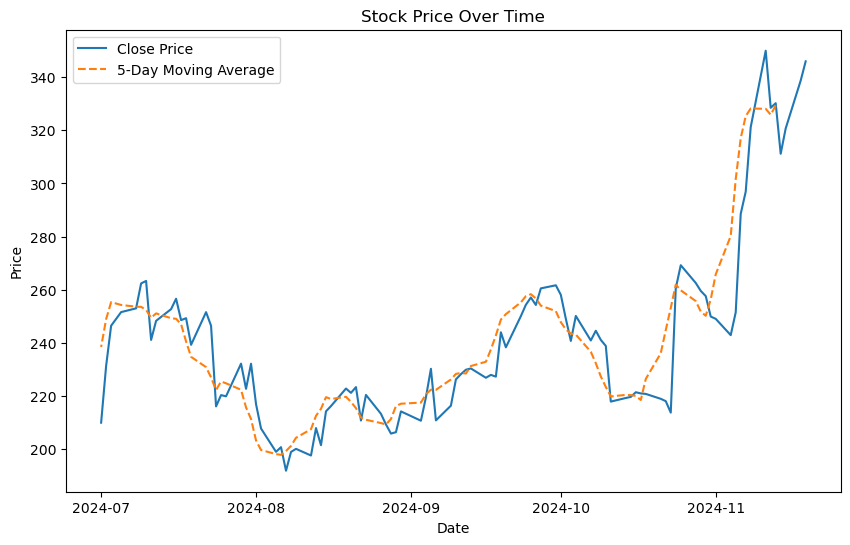

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['close'], label='Close Price')
plt.plot(df.index, df['Moving_avg'], label='5-Day Moving Average', linestyle='--')
plt.legend()
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()